In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
from math import pi

In [2]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

In [3]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [5]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


##### 散布図行列

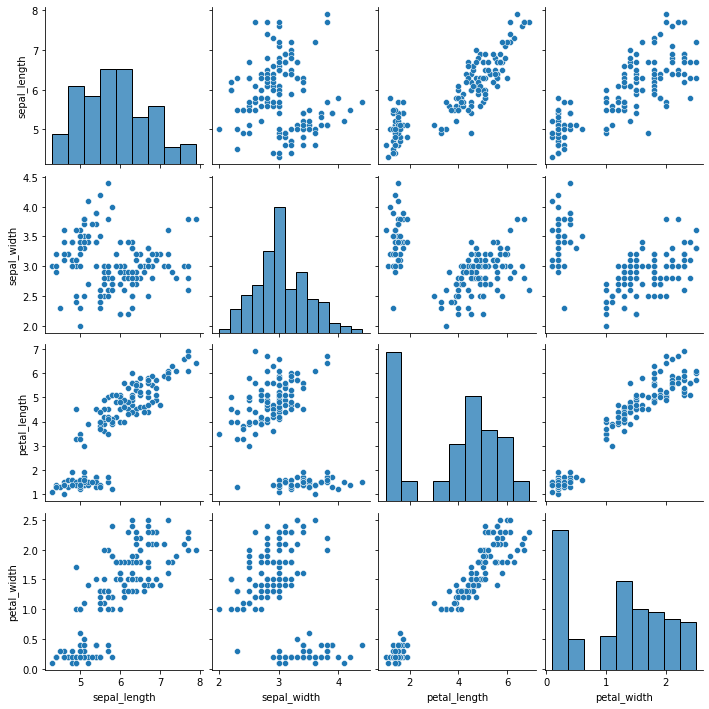

In [6]:
sns.pairplot(iris)

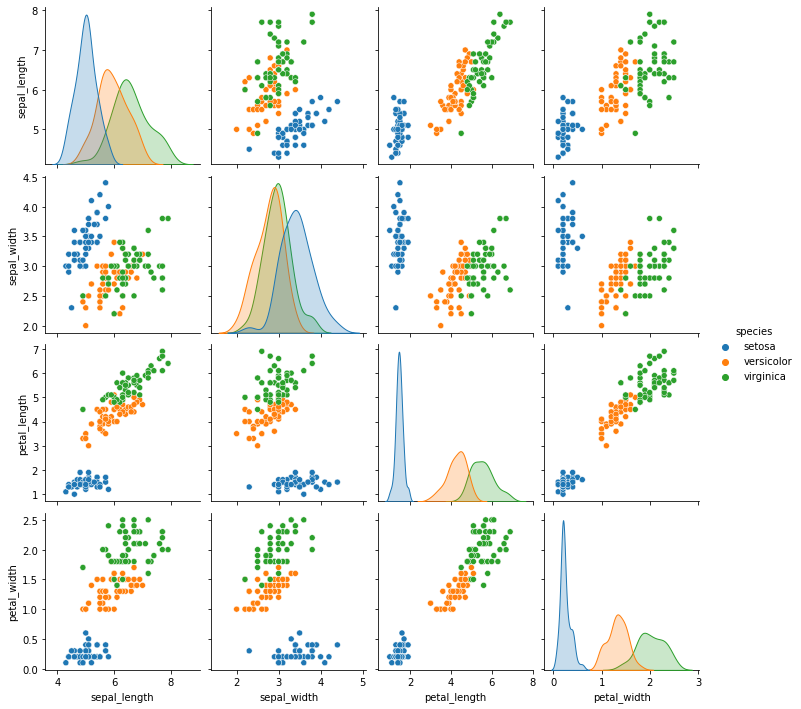

In [7]:
sns.pairplot(iris, hue="species")

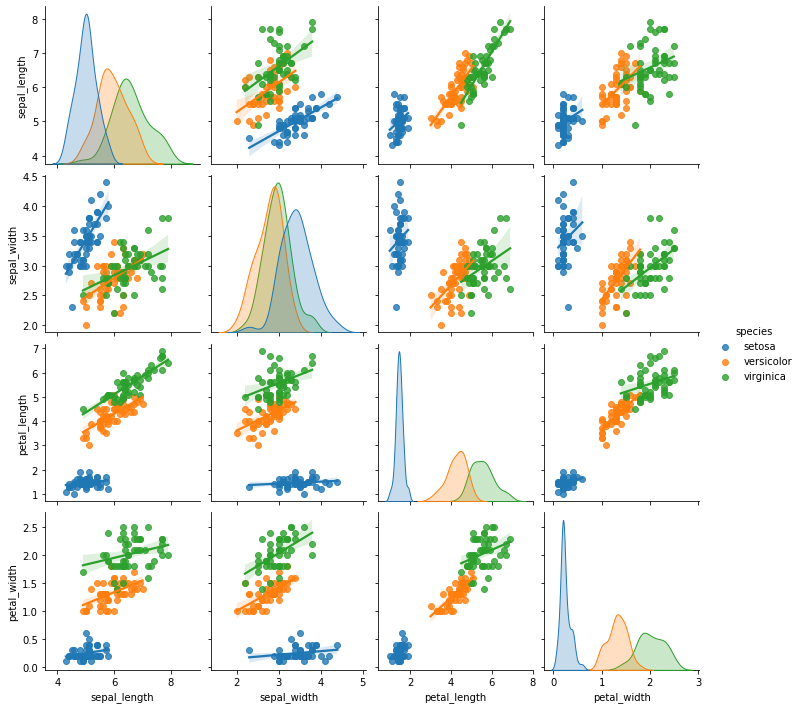

In [8]:
sns.pairplot(iris, hue="species", kind='reg')

##### 散布図

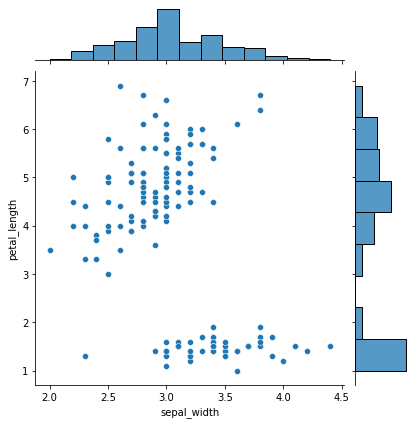

In [9]:
sns.jointplot(data=iris, x='sepal_width', y='petal_length')

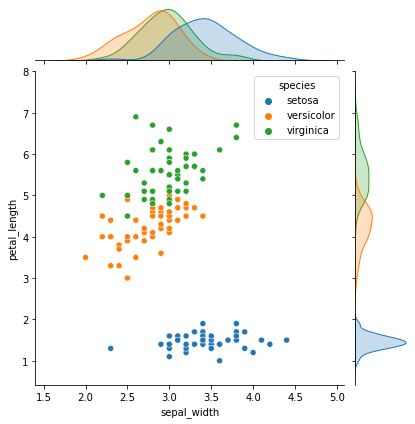

In [10]:
sns.jointplot(data=iris, x='sepal_width', y='petal_length', hue="species")

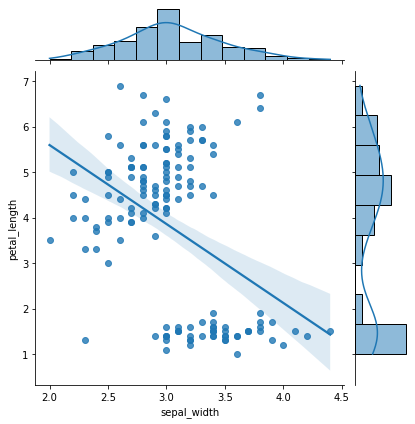

In [11]:
# 回帰直線
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='reg')

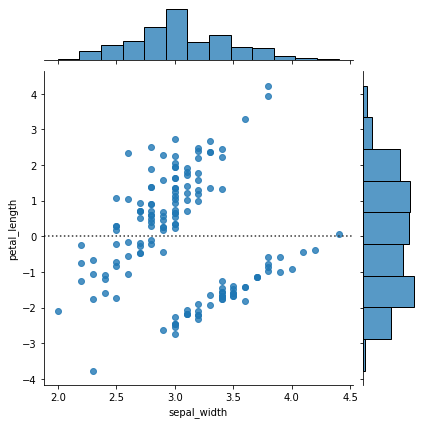

In [12]:
# 残差誤差
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='resid')

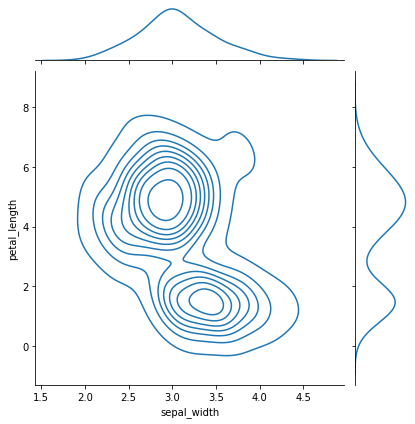

In [13]:
# カーネル密度推定
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='kde')

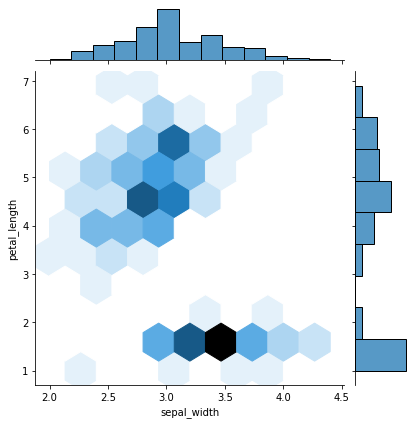

In [14]:
# ヒートマップ
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='hex')

##### countplot barplot

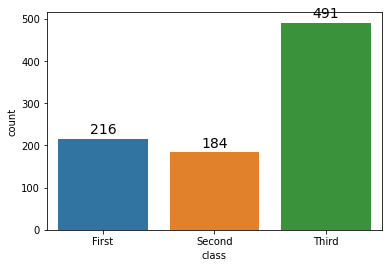

In [15]:
ax = sns.countplot(data=titanic, x="class")
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),
              (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', 
              va = 'center', 
              xytext = (0, 9), 
              textcoords = 'offset points',
              fontsize = 14,
              color = 'k')

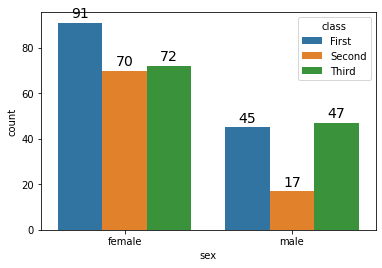

In [16]:
ax = sns.countplot(data=titanic[titanic['survived'] == 1], x="sex", hue="class")
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),
              (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', 
              va = 'center', 
              xytext = (0, 9), 
              textcoords = 'offset points',
              fontsize = 14,
              color = 'k')

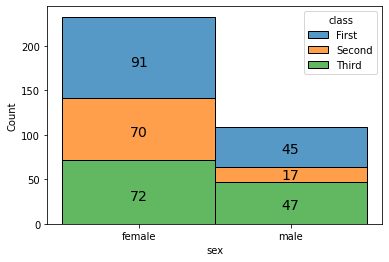

In [17]:
ax = sns.histplot(data=titanic[titanic['survived'] == 1], x="sex", hue='class', multiple='stack')

col_class_num = len(titanic['sex'].unique())
_height_class = [0,0]
for i, p in enumerate(ax.patches):
  if i % col_class_num == 0:
    _height = _height_class[0]+p.get_height()
    _height_class[0] += p.get_height()
  elif i % col_class_num == 1:
    _height = _height_class[1]+p.get_height()
    _height_class[1] += p.get_height()
  ax.annotate(format(p.get_height(), '.0f'),
              (p.get_x() + p.get_width() / 2., _height), 
              ha = 'center', 
              va = 'center',
              xytext = (0, -p.get_height() / 2.), 
              textcoords = 'offset points',
              fontsize = 14,
              color = 'k')

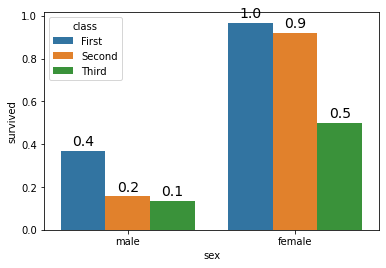

In [18]:
ax = sns.barplot(data=titanic, x="sex", y="survived", hue="class", ci=None)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'),
              (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', 
              va = 'center', 
              xytext = (0, 9), 
              textcoords = 'offset points',
              fontsize = 14,
              color = 'k')

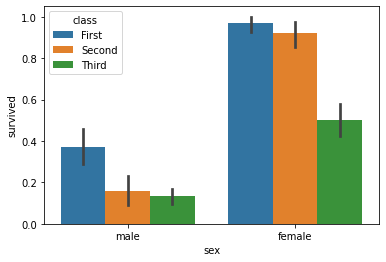

In [19]:
# 95%の信頼区間
sns.barplot(data=titanic, x="sex", y="survived", hue="class", ci=95)

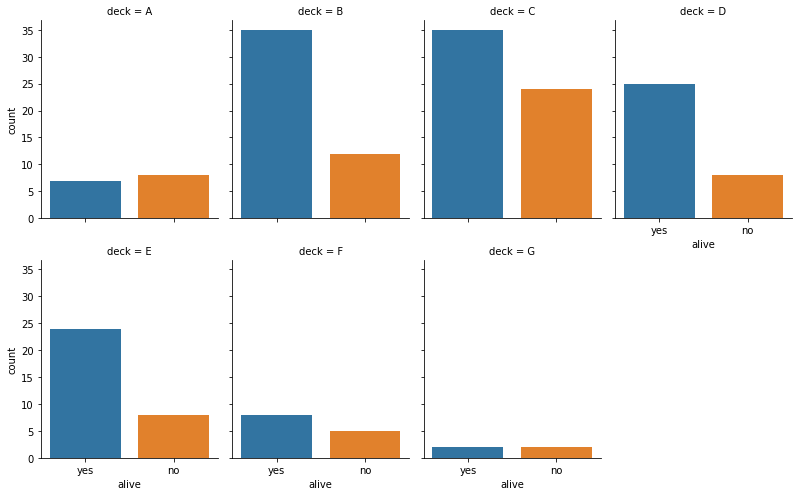

In [20]:
ax = sns.catplot(data=titanic[titanic.deck.notnull()], x="alive", col="deck", col_wrap=4,
            kind="count", height=3.5, aspect=.8)

##### boxplot

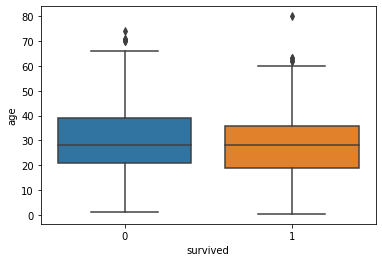

In [21]:
sns.boxplot(data=titanic, x="survived", y="age")

##### violinplot

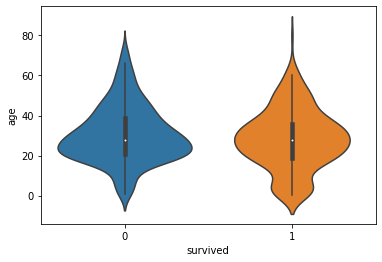

In [22]:
sns.violinplot(data=titanic, x="survived", y="age")

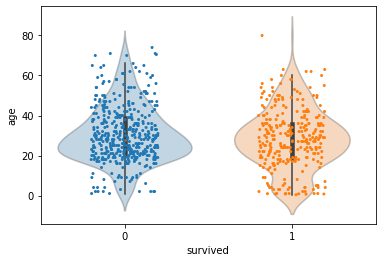

In [23]:
g = sns.violinplot(data=titanic, x="survived", y="age")
for g_ in g.collections:
  g_.set_alpha(0.3)
sns.stripplot(data=titanic, x="survived", y="age", jitter=0.2, size=3)

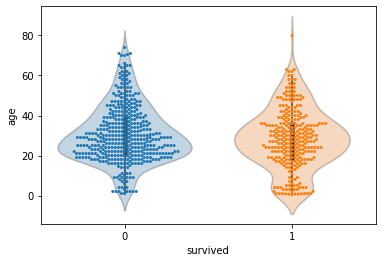

In [24]:
g = sns.violinplot(data=titanic, x="survived", y="age")
for g_ in g.collections:
  g_.set_alpha(0.3)
sns.swarmplot(data=titanic, x="survived", y="age", size=3)

##### ヒストグラム

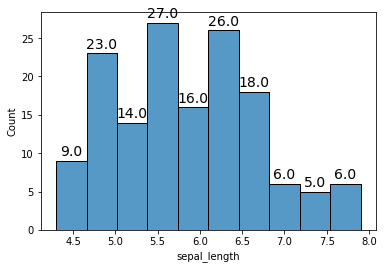

In [25]:
ax = sns.histplot(data=iris, x='sepal_length', bins=10, kde=False)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'),
              (p.get_x() + p.get_width() / 2., 
              p.get_height()), 
              ha = 'center', 
              va = 'center', 
              xytext = (0, 9), 
              textcoords = 'offset points',
              fontsize = 14,
              color = 'k')

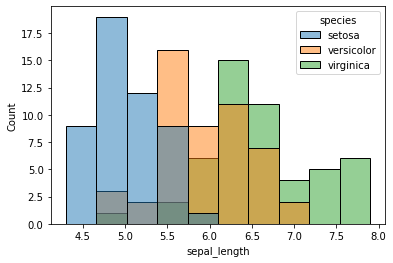

In [26]:
sns.histplot(data=iris, x='sepal_length', hue='species', bins=10, kde=False)

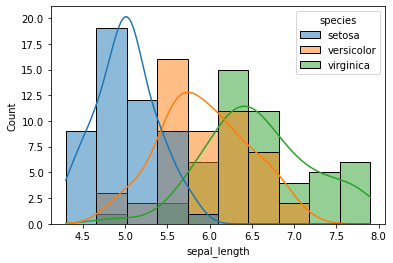

In [27]:
sns.histplot(data=iris, x='sepal_length', hue='species', bins=10, alpha=0.5, kde=True)

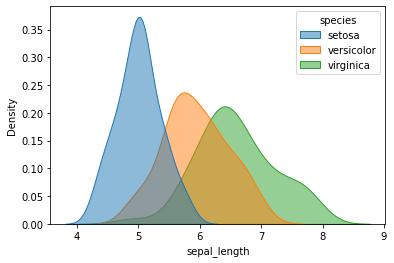

In [28]:
sns.kdeplot(data=iris, x='sepal_length', hue='species', alpha=0.5, fill=True)

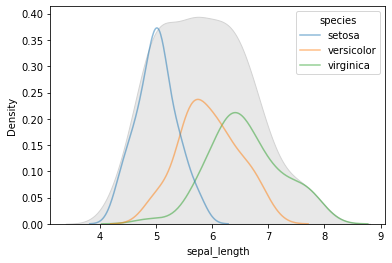

In [29]:
sns.kdeplot(data=iris, x='sepal_length', hue='species', alpha=0.5)
sns.kdeplot(data=iris, x='sepal_length', alpha=0.5, color='lightgray', fill=True)

##### 相関図

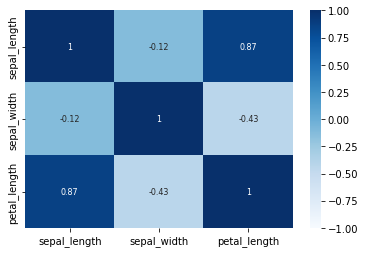

In [30]:
corr = iris[['sepal_length', 'sepal_width', 'petal_length']].corr(method='pearson')
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, annot_kws={'size': 8}, cmap='Blues')

##### レーダーチャート

<ipython-input-31-1c96d397e0b4>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


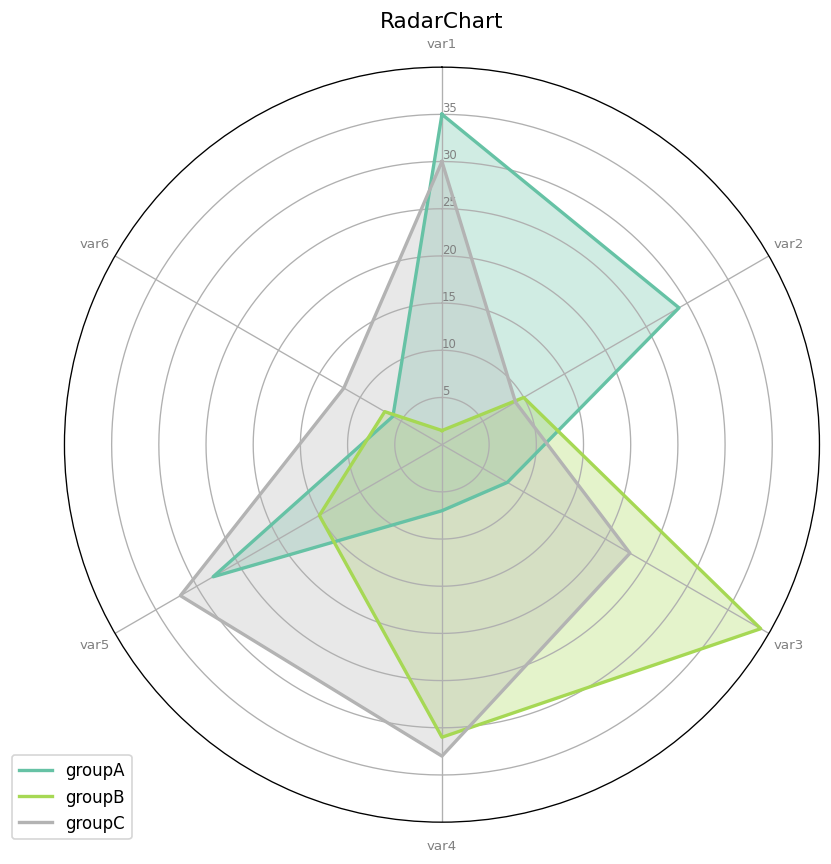

In [31]:
def make_spider(df, color, data_min=0, data_max=100, scale=10, label=None, title=None, ax=None):
    categories=list(df)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([n for n in range(data_min+scale,data_max,scale)],
               [str(n) for n in range(data_min+scale,data_max,scale)],
               color="grey", size=7)
    plt.ylim(data_min, data_max)

    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.3)
    if title:
        plt.title(title, size=13, color='k', x=.5, y=1)
    
    plt.subplots_adjust(wspace=0., hspace=0.3)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

df = pd.DataFrame({
    'group': ['A','B','C'],
    'var1': [35, 1.5, 30],
    'var2': [29, 10, 9],
    'var3': [8, 39, 23],
    'var4': [7, 31, 33],
    'var5': [28, 15, 32],
    'var6': [6, 7, 12],
    })
data_max = round(int(df.describe().max().max()), -1)
data_min = int(min(df.describe().min().min(), 0))

dpi=120
plt.figure(figsize=(1000/dpi, 1000/dpi), dpi=dpi)
palette = plt.cm.get_cmap("Set2", len(df.index))

scale=5
for row in range(0, len(df.index)):
    make_spider(df=df, label='group'+df['group'][row], title='RadarChart', color=palette(row), data_min=data_min, data_max=data_max, scale=scale)
plt.show()

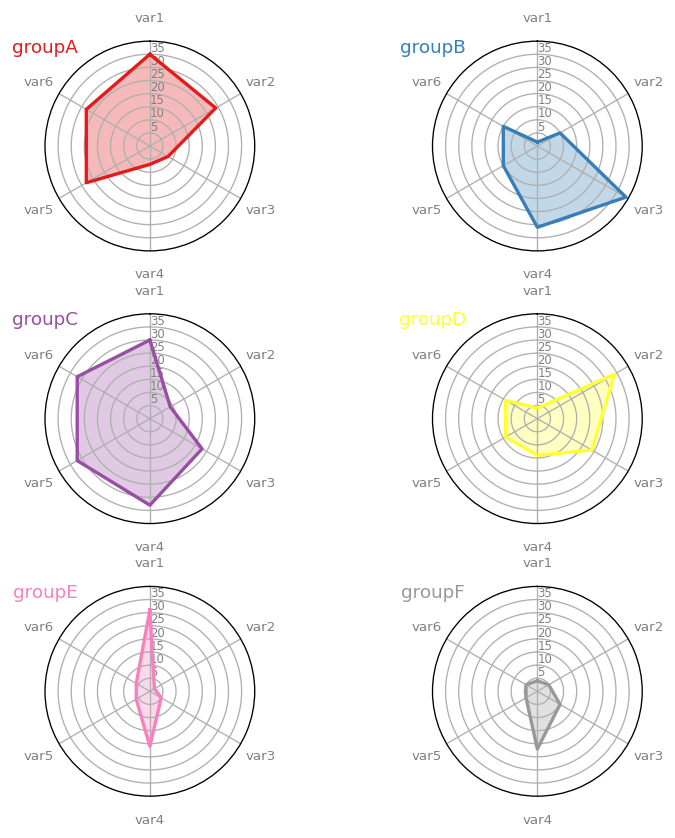

In [32]:
def make_spider(df, nrows, ncols, index, color, data_min=0, data_max=100, scale=10, label=None, title=None, ax=None):
    categories=list(df)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    if ax == None:
        ax = plt.subplot(nrows, ncols, index+1, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([n for n in range(data_min+scale,data_max,scale)],
               [str(n) for n in range(data_min+scale,data_max,scale)],
               color="grey", size=7)
    plt.ylim(data_min, data_max)

    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.3)

    if title:
        plt.title(title, size=11, color=color, x=0, y=.9)
    plt.subplots_adjust(wspace=0., hspace=0.3)

df = pd.DataFrame({
    'group': ['A','B','C','D','E','F'],
    'var1': [35, 1.5, 30, 4, 31, 4],
    'var2': [29, 10, 9, 34, 2, 5],
    'var3': [8, 39, 23, 24, 5, 10],
    'var4': [7, 31, 33, 14, 21, 22],
    'var5': [28, 15, 32, 14, 6, 5],
    'var6': [28, 15, 32, 14, 6, 5],
    })
data_max = round(int(df.describe().max().max()), -1)
data_min = int(min(df.describe().min().min(), 0))

dpi=120
plt.figure(figsize=(1000/dpi, 1000/dpi), dpi=dpi)
palette = plt.cm.get_cmap("Set1", len(df.index))

scale=5
nr, nc = 3, 2
for row in range(0, len(df.index)):
    make_spider(df, nr, nc, row, title='group'+df['group'][row], color=palette(row), data_min=data_min, data_max=data_max, scale=scale)
plt.show()

In [33]:
df.head(3)

,group,var1,var2,var3,var4,var5,var6
0,A,35.0,29,8,7,28,28
1,B,1.5,10,39,31,15,15
2,C,30.0,9,23,33,32,32


##### べん図

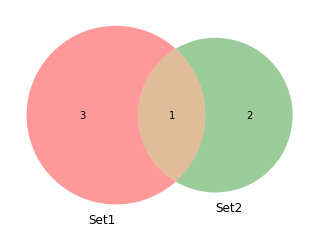

In [34]:
set_labels = ('Set1', 'Set2')
s_1, s_2, s_1_and_2 = [3, 2, 1]
venn2(subsets=(s_1, s_2, s_1_and_2), set_labels=set_labels)

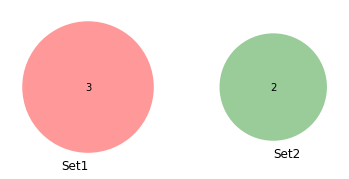

In [35]:
set_labels = ('Set1', 'Set2')
s_1, s_2, s_1_and_2 = [3, 2, 0]
venn2(subsets=(s_1, s_2, s_1_and_2), set_labels=set_labels)

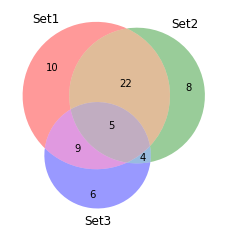

In [36]:
set_labels = ('Set1', 'Set2', 'Set3')
s_1, s_2, s_1_and_2, s_3, s_1_and_3, s_2_and_3, s_1_and_2_amd_3 = [10, 8, 22, 6, 9, 4, 5]
venn3(subsets = (s_1, s_2, s_1_and_2, s_3, s_1_and_3, s_2_and_3, s_1_and_2_amd_3), set_labels=set_labels)

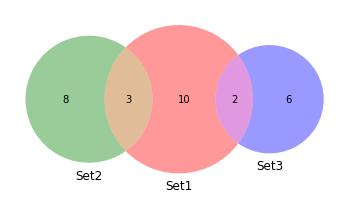

In [37]:
set_labels = ('Set1', 'Set2', 'Set3')
s_1, s_2, s_1_and_2, s_3, s_1_and_3, s_2_and_3, s_1_and_2_amd_3 = [10, 8, 3, 6, 2, 0, 0]
venn3(subsets = (s_1, s_2, s_1_and_2, s_3, s_1_and_3, s_2_and_3, s_1_and_2_amd_3), set_labels=set_labels)

##### 複数グラフ

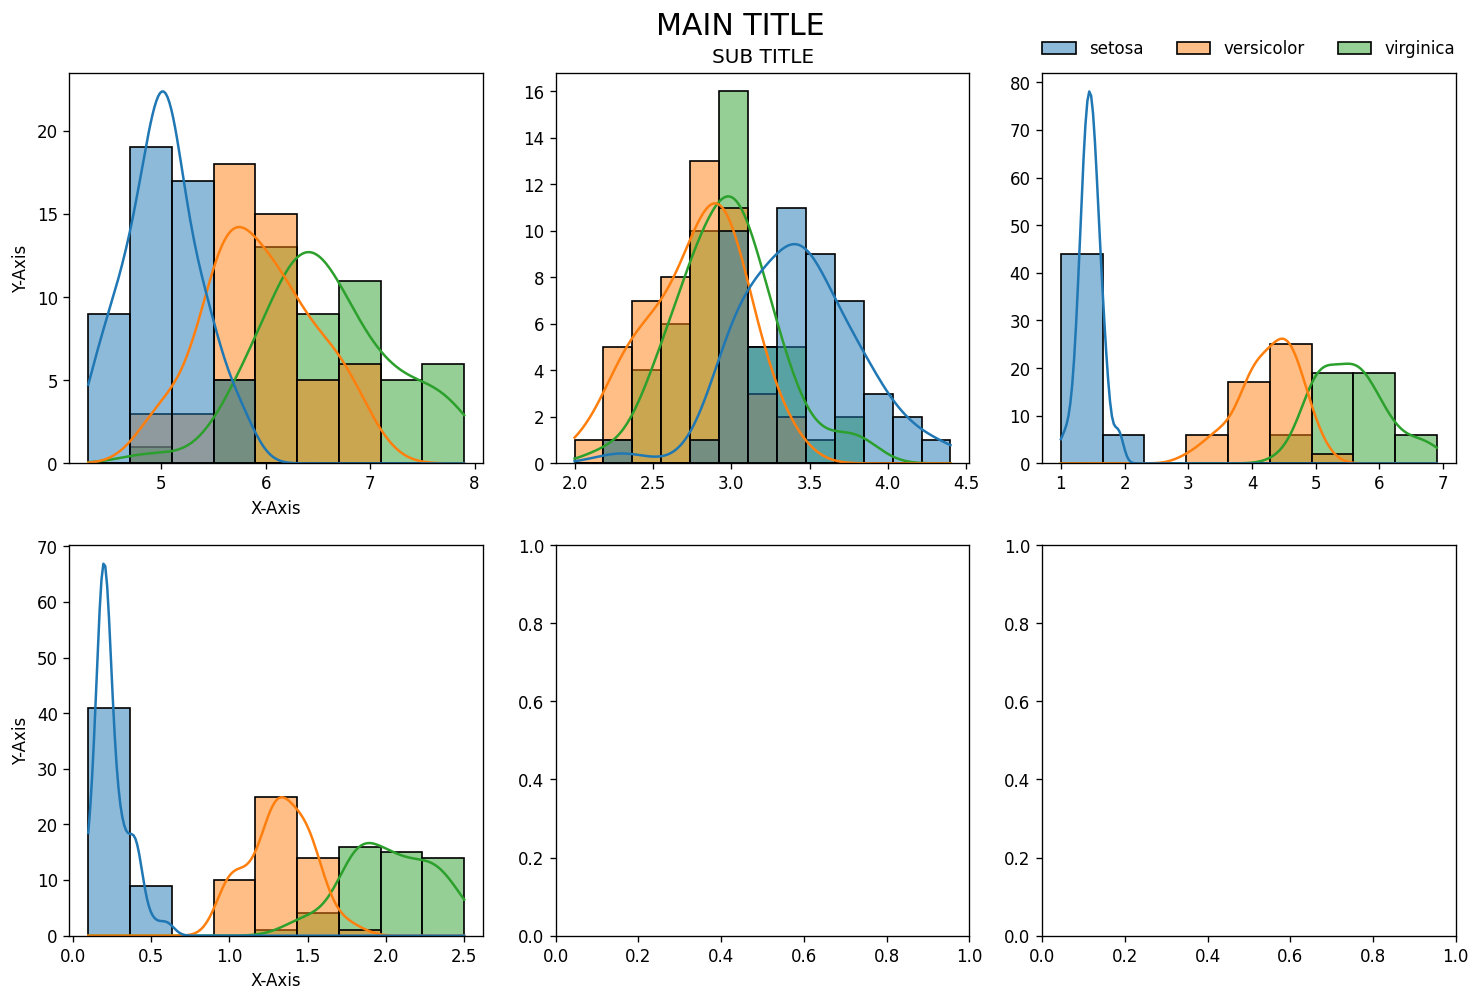

In [38]:
dpi=120
nr, nc = 2, 3
fig, axes = plt.subplots(nr, nc, figsize=(1000*(nc/nr)/dpi, 1000/dpi), dpi=dpi, tight_layout=True, facecolor="w")
axes = axes.ravel()

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, (col, ax) in enumerate(zip(cols, axes)):
  if i == 2:
    grid = sns.histplot(data=iris, x=col, hue='species', legend=True, kde=True, ax=ax)
    sns.move_legend(grid, "lower center",
                    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
  else:
    grid = sns.histplot(data=iris, x=col, hue='species', legend=False, kde=True, ax=ax)

  if i == 1:
    grid.set_title("SUB TITLE")

  if i in [0,3]:
    grid.set(xlabel="X-Axis", ylabel="Y-Axis")
  else:
    grid.set(xlabel="", ylabel="")

fig.suptitle("MAIN TITLE", size=18, weight=2, x=.5, y=1)

sns.set(font_scale=1)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.savefig('img.png')

##### cmap

In [39]:
from ipywidgets import interact

|code|color               |
|----|--------------------|
| b  | 青 (Blue)          |
| g  | 緑 (Green)         |
| r  | 赤 (Red)           |
| c  |  シアン (Cyan)      |
| m  | マゼンタ (Magenta) |
| y  | 黄 (Yellow)        |
| k  | 黒 (Black)         |
| w  | 白 (White)         |

In [40]:
def show_pal0(palette):
    sns.palplot(sns.color_palette(palette, 24))
interact(show_pal0, palette='deep muted pastel bright dark colorblind'.split());

interactive(children=(Dropdown(description='palette', options=('deep', 'muted', 'pastel', 'bright', 'dark', 'c…

In [41]:
sns.choose_colorbrewer_palette('qualitative');

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [42]:
xs = np.arange(1, 10)
ys = np.arange(1, 10).reshape(9, 1)
m = xs * ys
df = pd.DataFrame(m)

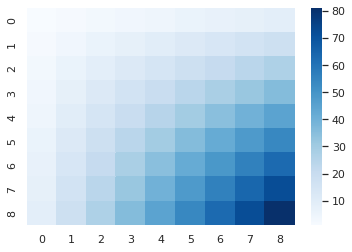

In [43]:
sns.heatmap(df, cmap='Blues')

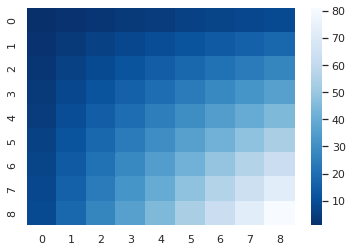

In [44]:
sns.heatmap(df, cmap='Blues_r')

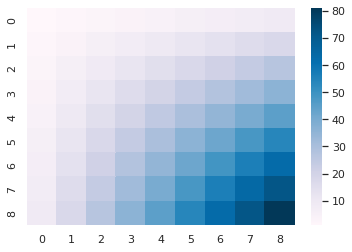

In [45]:
sns.heatmap(df, cmap='PuBu')

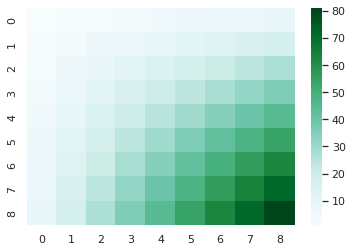

In [46]:
sns.heatmap(df, cmap='BuGn')

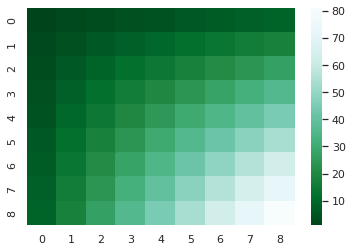

In [47]:
sns.heatmap(df, cmap='BuGn_r')

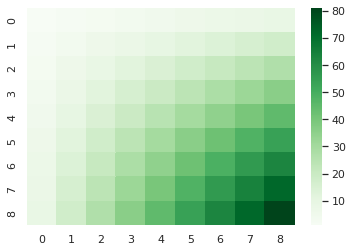

In [48]:
sns.heatmap(df, cmap='Greens')

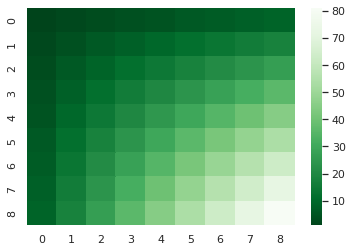

In [49]:
sns.heatmap(df, cmap='Greens_r')

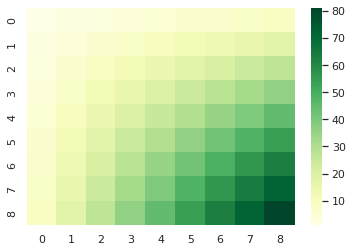

In [50]:
sns.heatmap(df, cmap='YlGn')

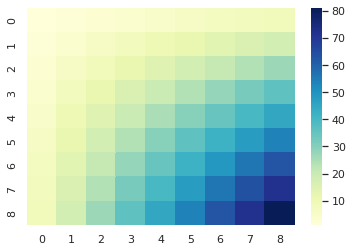

In [51]:
sns.heatmap(df, cmap='YlGnBu')

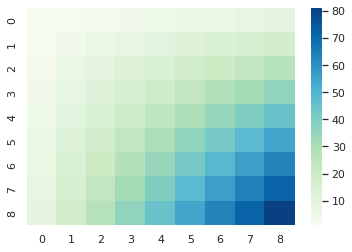

In [52]:
sns.heatmap(df, cmap='GnBu')

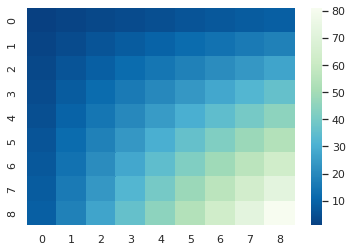

In [53]:
sns.heatmap(df, cmap='GnBu_r')

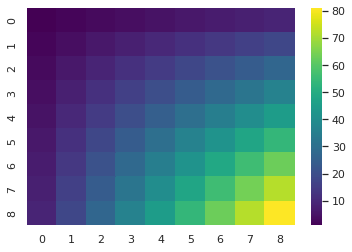

In [54]:
sns.heatmap(df, cmap='viridis')

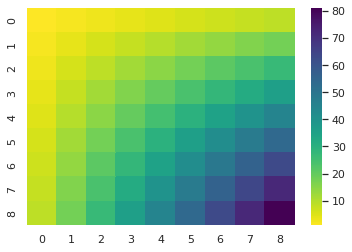

In [55]:
sns.heatmap(df, cmap='viridis_r')

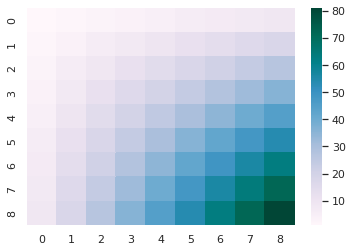

In [56]:
sns.heatmap(df, cmap='PuBuGn')

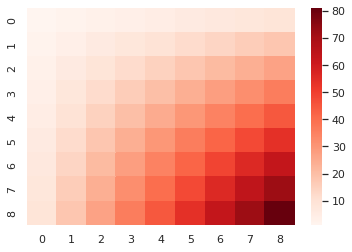

In [57]:
sns.heatmap(df, cmap='Reds')

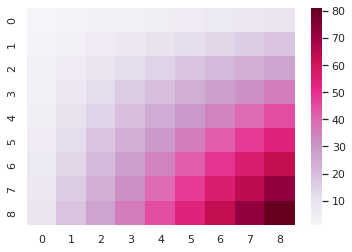

In [58]:
sns.heatmap(df, cmap='PuRd')

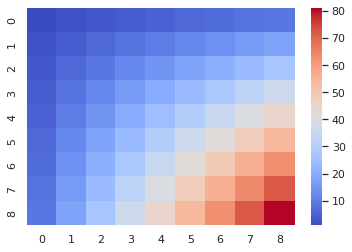

In [59]:
sns.heatmap(df, cmap='coolwarm')

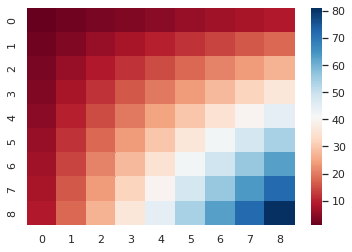

In [60]:
sns.heatmap(df, cmap='RdBu')

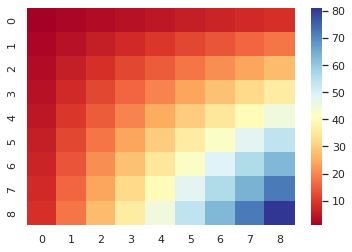

In [61]:
sns.heatmap(df, cmap='RdYlBu')

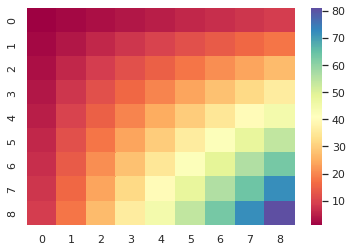

In [62]:
sns.heatmap(df, cmap='Spectral')

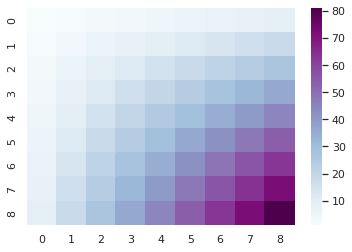

In [63]:
sns.heatmap(df, cmap='BuPu')

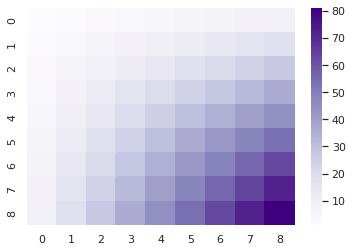

In [64]:
sns.heatmap(df, cmap='Purples')

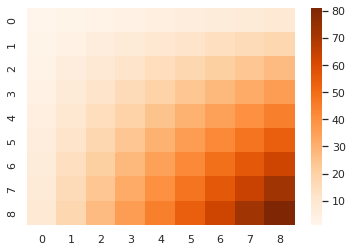

In [65]:
sns.heatmap(df, cmap='Oranges')

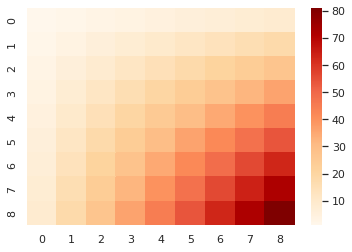

In [66]:
sns.heatmap(df, cmap='OrRd')

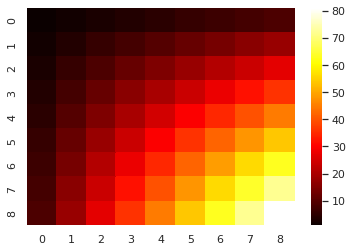

In [67]:
sns.heatmap(df, cmap='hot')

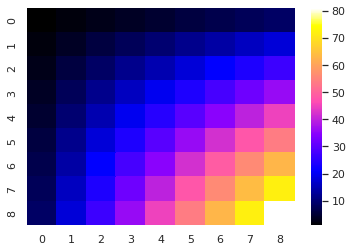

In [68]:
sns.heatmap(df, cmap='gnuplot2')

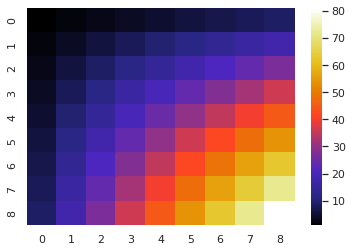

In [69]:
sns.heatmap(df, cmap='CMRmap')

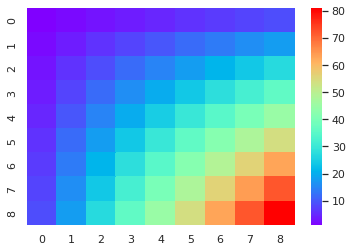

In [70]:
sns.heatmap(df, cmap='rainbow')

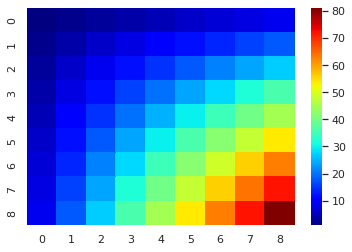

In [71]:
sns.heatmap(df, cmap='jet')

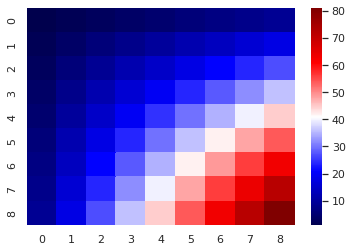

In [72]:
sns.heatmap(df, cmap='seismic')

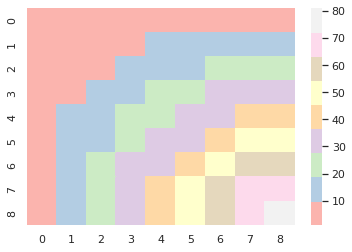

In [73]:
sns.heatmap(df, cmap='Pastel1')

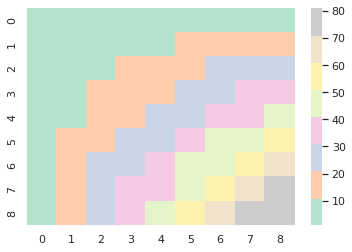

In [74]:
sns.heatmap(df, cmap='Pastel2')

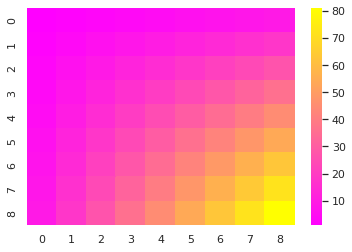

In [75]:
sns.heatmap(df, cmap='spring')

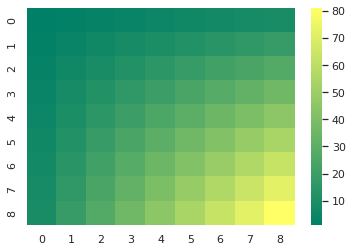

In [76]:
sns.heatmap(df, cmap='summer')

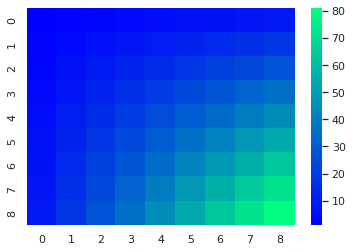

In [77]:
sns.heatmap(df, cmap='winter')